# The Android App Market on Google Play

Load, clean, and visualize scraped Google Play Store data to gain insights into the Android app market.

## Project Description

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention. The <a href=https://www.kaggle.com/lava18/google-play-store-apps>data</a> for this project was scraped from the <a href=https://play.google.com/store/apps?hl=en>Google Play</a> website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

- __apps.csv__: contains all the details of the apps on Google Play. These are the features that describe an app.
- __user_reviews.csv__: contains 100 reviews for each app, <a href=https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/>most helpful first</a>. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.

### Guided Project

Through a series of guided steps, harness your complete data analyst toolbox to perform data wrangling, create visualizations, and carry out a descriptive and inferential analysis.

### Project Tasks
1. Google Play Store apps and reviews
2. Data cleaning
3. Correcting data types
4. Exploring app categories
5. Distribution of app ratings
6. Size and price of an app
7. Relation between app category and app price
8. Filter out "junk" apps
9. Popularity of paid apps vs free apps
10. Sentiment analysis of user reviews

# Task 1: Google Play Store apps and reviews

Import the data, drop duplicate rows, and inspect the data.

- Load datasets/apps.csv into a DataFrame and assign it to the variable apps_with_duplicates.
- Drop all duplicate rows from apps_with_duplicates and assign the result to apps.
- Print the total number of apps.
- Finally, display a random sample of 5 rows from apps.

___________________
**Good to know**

This project lets you apply the skills from <a href=https://www.datacamp.com/courses/joining-data-with-pandas>Joining Data with pandas</a>. We recommend that you take this course before starting this project.

The <a href=https://www.kaggle.com/lava18/google-play-store-apps>data</a> for this project was scraped from the <a href=https://play.google.com/store/apps?hl=en>Google Play</a> website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former.

Helpful links:
- pandas read_csv() <a href=https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.read_csv.html>documentation</a>
- pandas drop_duplicates() <a href=https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.drop_duplicates.html>documentation</a>

__Note__: This project also uses the plotting libraries <a href=https://seaborn.pydata.org/>Seaborn</a> and <a href=https://plotly.com/python/>Plotly</a> to help visualize the results of some steps. However, the tasks have been written in such a way that you should be able to complete them without any prior experience.
___________________

> Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.
<br><br>
Let's take a look at the data, which consists of two files:
<br>
>- apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
>- user_reviews.csv: contains 100 reviews for each app, <a href=https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/>most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [1]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')
len(apps_with_duplicates)

9659

In [2]:
# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
apps.head()

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Task 2: Data cleaning

Clean the dataset.

- Create a list named chars_to_remove that contains the following characters: + , and $.
- Create a list named cols_to_clean that contains the following column names: Installs and Price.
- For each column in cols_to_clean in the apps DataFrame, replace each character in chars_to_remove with the empty string ''.<br>
__Note__: Make sure to use an empty string '' and not a space character ' '
- Finally, print a summary of the apps dataframe using the info() function. Observe the output.<br>
__Note__: Notice that Installs and Price are still of type object and not int or float as we would have expected after removal of the special characters. We will solve this issue in the next task.

___________________
**Helpful links:**

pandas apply() <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html>documentation</a>
Python replace() <a href=https://www.w3schools.com/python/ref_string_replace.asp>documentation</a>
pandas info() <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html>documentation</a>
___________________

> Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it's worth should never be undermined.
<br><br>
By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like $Installs$ and $Price$ have a few special characters $(+ , \$)$ due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from $[0-9]$.
<br><br>
Hence, we now proceed to clean our data. Specifically, the special characters $,$ and $+$ present in $Installs$ column and $\$$ present in $Price$ column need to be removed.
<br><br>
It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the info() method to acheive this.

In [3]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB
None


In [4]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

# Delete 'M' char from Size columns
apps['Size'] = apps['Size'].str.replace('M','', regex=False)
        
# Print a summary of the apps dataframe
print(apps.info())
apps.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Task 3: Correcting data types

- Convert Installs and Price columns to float data type using astype() function.
- Verify the corrected data types by using the dtypes attribute of apps dataframe. (You can also reuse the info() function to verify the corrected data types)

___________________
**Helpful links:**

- astype() <a href=https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html>documentation</a>
- <a href=https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/>Pandas data types</a>
___________________


> From the previous task we noticed that Installs and Price were categorized as object data type (and not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read <a href=https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/>this</a>.
<br><br>
The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. While Size and Rating are both float (i.e. purely numerical data types), we still need to work on Installs and Price to make them numeric.

In [5]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Convert Size to float data type
apps['Size'] = apps['Size'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Task 4: Exploring app categories

Create data for a bar chart that shows the distribution of apps across different categories.

- Find the number of unique app categories. Save your result in num_categories.
- Count the number of apps in each category and then sort the categories in descending order of app count. Save your answer in sorted_num_apps_in_category.

___________________
**Helpful links**:

- unique() <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html>documentation</a>
- value_counts() <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html>documentation</a>
- sort_values() <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html>documentation</a>
___________________

> With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.
<br><br>
This brings us to the following questions:
<br><br>
>- Which category has the highest share of (active) apps in the market?
>- Is any specific category dominating the market?
>- Which categories have the fewest number of apps?
>
>We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [6]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = apps.Category.nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps.Category.value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
print(sorted_num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


# Task 5: Distribution of app ratings

Create a plot annotation for average app rating.

- Find the average app rating and assign it to avg_app_rating.
___________________
**Helpful links**:

- mean() <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html>documentation</a>
- Plotly histogram <a href=https://plot.ly/python/histograms/>documentation</a>
___________________

> After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.
<br><br>
From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [7]:
# Average rating of apps
avg_app_rating = apps.Rating.mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


# Task 6: Size and price of an app

Examine the relationship between size, price, and rating of apps using jointplot().

Recall from Task #1 that we had observed some missing values in the Rating and Size columns. To make rational decisions, it is important that we do not consider these missing values in our analysis. We will work with a subset apps_with_size_and_rating_present DataFrame for this task.

- Select rows from apps where both Rating and Size values are present, ie - they are not null. Store the result in the apps_with_size_and_rating_present dataframe.
- From apps_with_size_and_rating_present, select the categories having atleast 250 apps. Assign the result to large_categories dataframe.
- Fill out x and y to create a joint plot of Rating as a function of Size.
- From apps_with_size_and_rating_present dataframe, select all Paid apps. Save the result in paid_apps.
- Fill out x and y to create a joint plot of Rating as a function of Price.

___________________
**Helpful links**:

- There are many ways to subset a dataframe and select rows based on a column value. <a href=https://campus.datacamp.com/courses/data-manipulation-with-pandas/transforming-data?ex=7>This exercise</a> from Data Manipulation with pandas may be a good starting place.
- jointplot() <a href=https://seaborn.pydata.org/generated/seaborn.jointplot.html>documentation</a>
___________________

> Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.
<br><br>
How can we effectively come up with strategies to size and price our app?
>- Does the size of an app affect its rating?
>- Do users really care about system-heavy apps or do they prefer light-weighted apps?
>- Does the price of an app affect its rating?
>- Do users always prefer free apps over paid apps?
>
>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

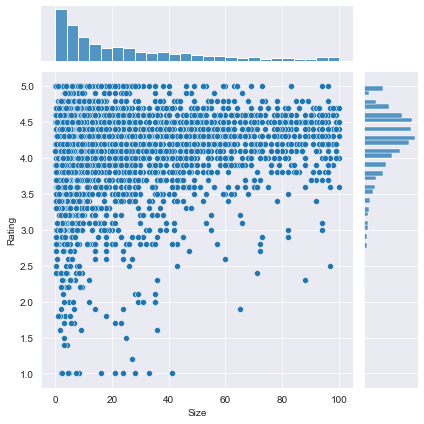

In [8]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps.query('Rating.notnull() and Size.notnull()')

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

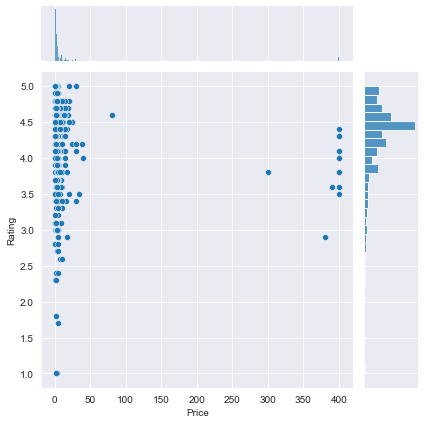

In [9]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present.query("Type == 'Paid'")

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

# Task 7: Relation between app category and app price

___________________
Here are some interesting websites that can estimate app price:

- <a href=https://estimatemyapp.com/>Estimate my app</a>
- <a href=http://howmuchtomakeanapp.com/>How much to make an app</a>


**Helpful links**:

- stripplot() <a href=https://seaborn.pydata.org/generated/seaborn.stripplot.html>documentation</a>
- <a href=https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/>Filter rows</a> in pandas
___________________

> So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.
<br><br>
There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.
<br><br>
Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $\$80$! All game apps are reasonably priced below $\$20$.

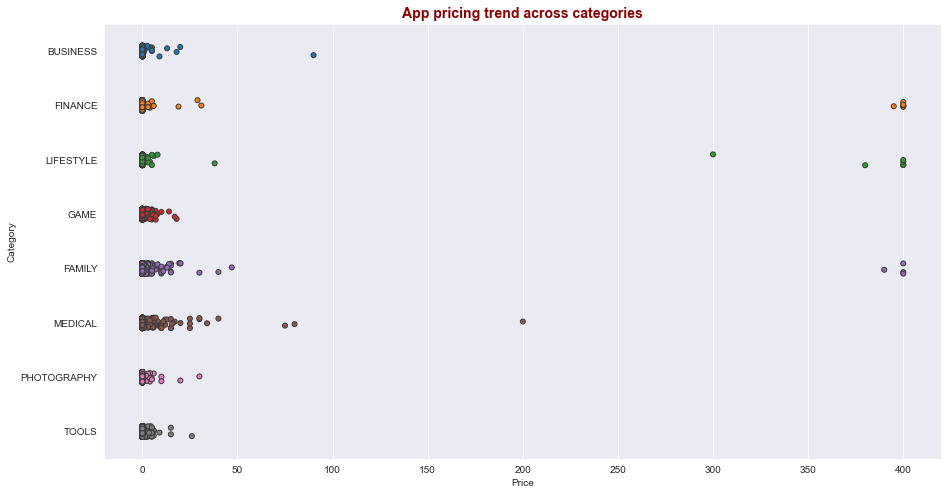

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories', **title_param)
plt.show()

# Apps whose Price is greater than 200
apps_above_200 = apps.query('Price > 200')
apps_above_200[['Category', 'App', 'Price']]

# Task 8: Filter out "junk" apps

Filter out "junk" apps.
<br>
__Note__: For simplicity, we will continue to use the popular_app_cats dataframe (from previous task) and not our original dataframe apps

- Select rows from popular_app_cats that contain apps priced below $\$100$ and assign it to apps_under_100.
- Re-plot your strip plot using apps_under_100 dataframe (instead of popular_app_cats used in the previous task).


> It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.
<br><br>
Let's filter out these junk apps and re-do our visualization.

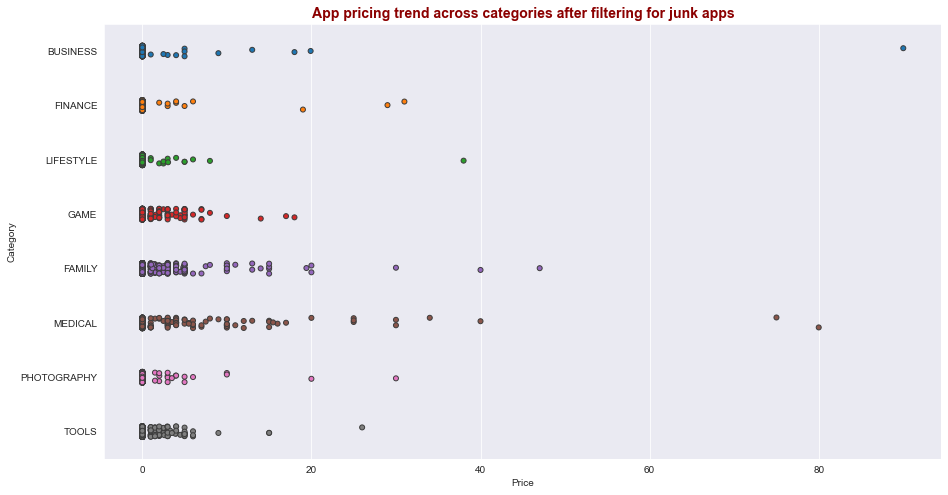

In [11]:
# Select apps priced below $100
apps_under_100 = popular_app_cats.query('Price < 100')

# Examine price vs category with the authentic apps (apps_under_100)
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
_ = ax.set_title('App pricing trend across categories after filtering for junk apps', **title_param)
plt.show()

# Task 9: Popularity of paid apps vs free apps

Prep the data for a box plot that compares the number of installs of paid apps vs. number of installs of free apps.

- From apps, filter rows where for Type == Paid, and select the Installs column and assign it to y of trace0.
- From apps, filter rows where for Type == Free, and select the Installs column and assign it to y of trace1.

___________________
**Helpful links**:

- Plotly box plot <a href=https://plot.ly/python/box-plots/>documentation</a>
- Interpreting box plots <a href=https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots>article</a>
___________________

> For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:
>
>- Free to download.
>- Main source of income often comes from advertisements.
>- Often created by companies that have other products and the app serves as an extension of those products.
>- Can serve as a tool for customer retention, communication, and customer service.
>
>Some characteristics of paid apps are:
>
>- Users are asked to pay once for the app to download and use it.
>- The user can't really get a feel for the app before buying it.
>
>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

In [12]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# Task 10: Sentiment analysis of user reviews

Load the user review data and plot it to visualize sentiment of paid vs. free apps.

- Read datasets/user_reviews.csv into the reviews_df DataFrame.
- Merge apps and reviews_df DataFrames and assign the result to merged_df.
- Create a box plot with Type on the x-axis and Sentiment_Polarity on the y-axis.

___________________
If you'd like to learn more about sentiment analysis, check out DataCamp's <a href=https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python>Natural Language Processing Fundamentals in Python</a> course.

**Helpful links**:

- pandas merge() function <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html>documentation</a>
- boxplot() <a href=https://seaborn.pydata.org/generated/seaborn.boxplot.html>documentation</a>
___________________

> Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.
<br><br>
By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.
<br><br>
In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

In [13]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [14]:
# Join the two dataframes
merged_df = apps.merge(reviews_df, on='App')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

merged_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


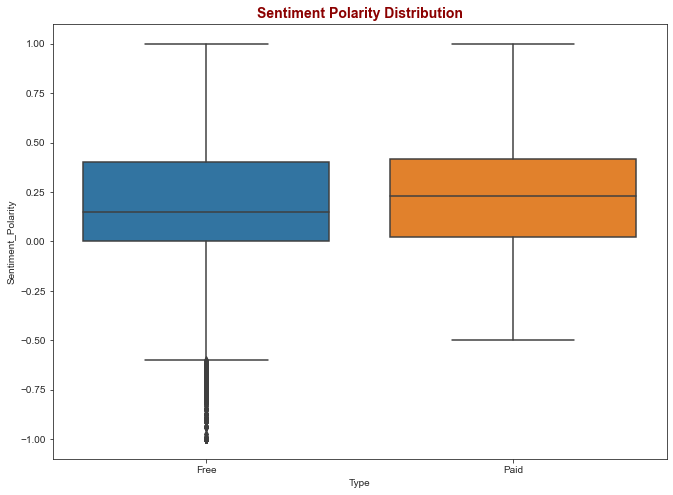

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
title_param    = {'color': 'darkred', 'fontsize': 14, 'weight': 'bold'}

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution', **title_param)
plt.show()

<font color=darkgreen>Congratulations, you passed all project tasks!
Rate this project to finish...</font>

# Aditional material

- Datacamp course: 
    - https://learn.datacamp.com/projects/android-app-market/guided/Python
    - https://projects.datacamp.com/projects/1237
- Datasets:
    - https://github.com/Raspiani/The-Android-App-Market-on-Google-Play/tree/master/datasets